In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris_dataset = load_iris()

In [4]:
iris_dataset.keys()

dict_keys(['target_names', 'data', 'target', 'DESCR', 'feature_names'])

In [5]:
print(iris_dataset['DESCR'])

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [6]:
print(iris_dataset['target_names'])

['setosa' 'versicolor' 'virginica']


In [7]:
print(iris_dataset['feature_names'])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [8]:
print(type(iris_dataset['data']),type(iris_dataset['target']))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [9]:
print(iris_dataset['data'].shape,iris_dataset['target'].shape)

(150, 4) (150,)


In [10]:
X = iris_dataset['data']

In [11]:
y = iris_dataset['target']

In [12]:
y.shape

(150,)

In [13]:
from sklearn.model_selection import train_test_split as tts

In [14]:
X_train,X_test,y_train,y_test = tts(X,y,test_size=.25,random_state=0)

In [15]:
plt.figure()

In [16]:
iris_df = pd.DataFrame(X_train,columns=iris_dataset.feature_names)

In [17]:
# creating a scatter matrix

/home/arpit/virtual_env_/allenv3/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


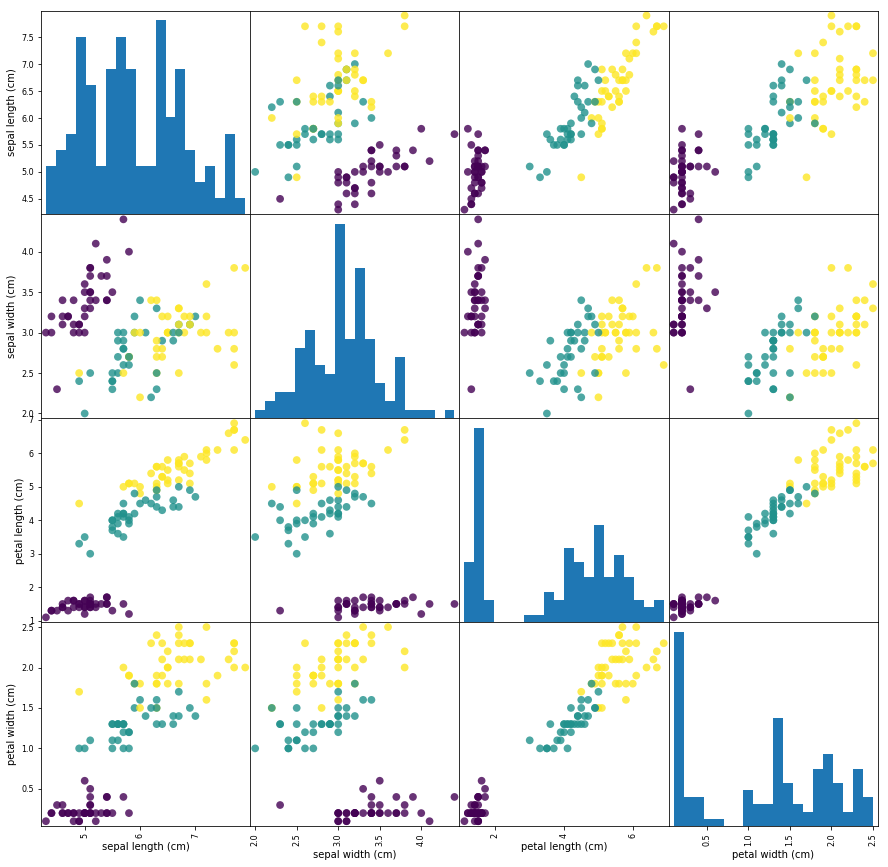

In [18]:
s_mat = pd.scatter_matrix(iris_df,c = y_train, figsize=(15,15), marker='o', hist_kwds={'bins':20},s=60,alpha=.8)

In [19]:
from sklearn.neighbors import KNeighborsClassifier as KNC

In [20]:
score = []
for i in range(1,51):
    clf = KNC(n_neighbors=i)
    clf.fit(X_train,y_train)
    score.append(clf.score(X_test,y_test))

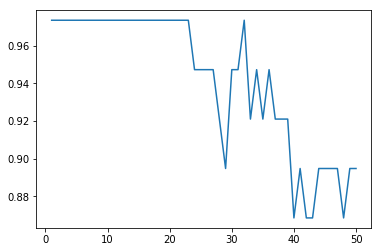

In [21]:
plt.plot(range(1,51),score)

In [22]:
accuracy = sum(score[:20])/20

In [23]:
accuracy

0.97368421052631537

In [24]:
iris_df.drop(['sepal length (cm)','sepal width (cm)'],axis=1,inplace=True)

/home/arpit/virtual_env_/allenv3/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


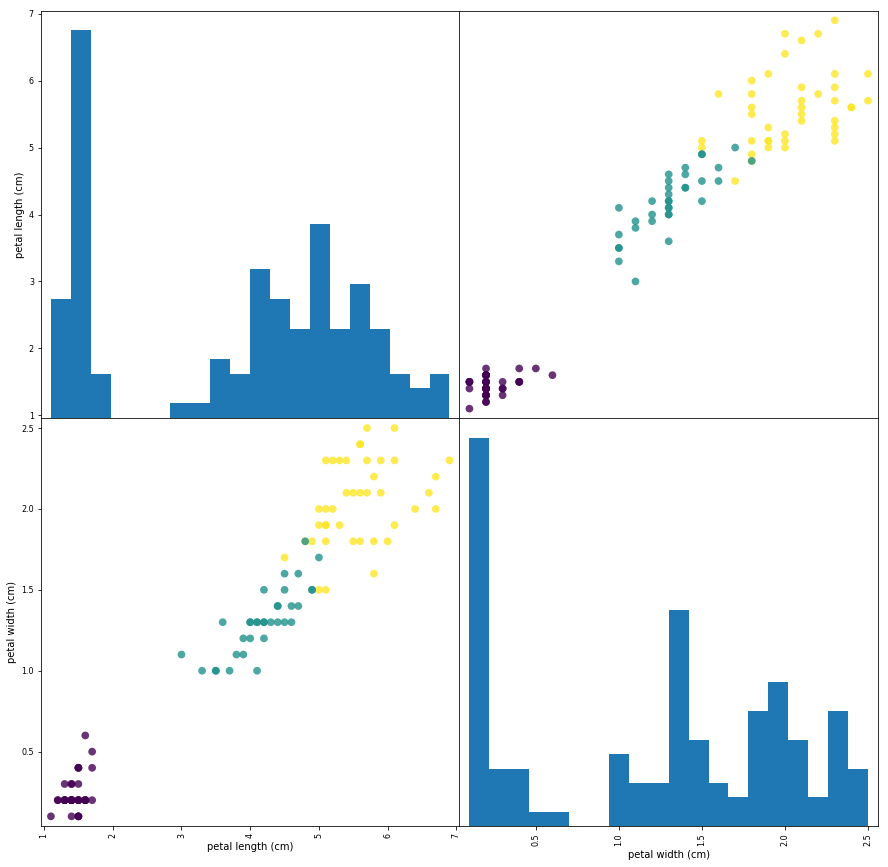

In [25]:
s_mat = pd.scatter_matrix(iris_df,c = y_train, figsize=(15,15), marker='o', hist_kwds={'bins':20},s=60,alpha=.8)

In [26]:
new_clf = KNC(n_neighbors=10)

In [27]:
X_train = X_train[:,2:]

In [28]:
X_test = X_test[:,2:]

In [29]:
new_clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [30]:
new_clf.score(X_test,y_test)

0.97368421052631582

In [31]:
# No change in accuracy